## Random Sample

The aim of this notebook is to demonstrate the concept of random sample via computer simulation. The idea is to create an underlying *population* which we generally don't have in practice. We then examine our understanding of statistics by constructing different random samples from this *population*. 

In doing so, we also introduce the module [scipy](https://www.scipy.org), a module for scientific computation in Python. The modules provides advanced functions that will aid our exploration. 

For example, the submodule [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) provides a library of fucntions for generating different random varaibles following different distributions. 

In [2]:
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

## Create the population

We start by using a random number generator to create a sample. This way we know the "true" value of our data in the sense of the exact distribution that the population follows. We then repeat this to generate more samples. In practice, we only have one such sample, which we call data, but in this simulation exercise we can generate as many samples as we want. This allows us to illustrate some of the more abstract concepts in statistics. 

As mentioned, scipy.stats contains random number generators for normal and many other distributions. The lines below generate $N$ NID (Normally, Identically, Independently Distributed) observations. The mean (loc) is *sm* and the standard deviation (scale) is *ss*. 

In [16]:
N = 30 #set sample size 
sm = 2 #set the mean of the population.
ss = 1 #set the standard deviation of the population.
data = sps.norm.rvs(size=N, loc=sm, scale=ss) 

### Characteristics of our first sample 
We examine this sample by the *histogram* and *boxplot*. We also calculate the mean and variance of this sample. 

For histogram, the method *plt.hist* is useful

Text(0.5, 1.0, 'Population with Meam 2 and Variance 1')

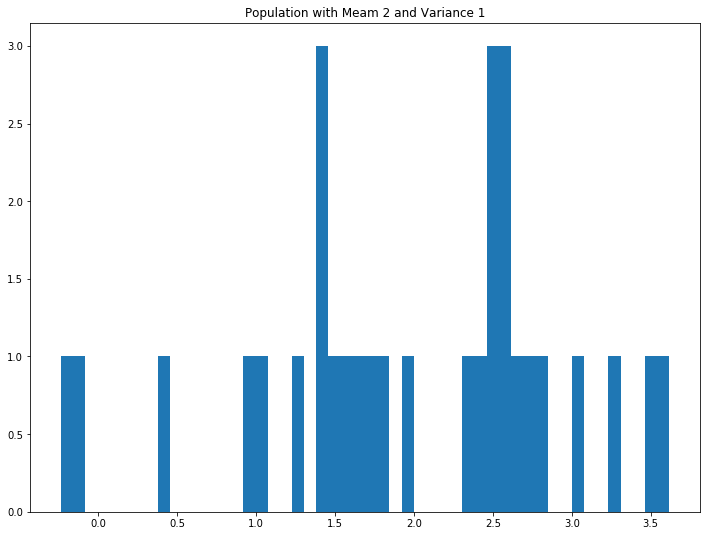

In [22]:
plt.hist(data, bins=50)
plt.title("Population with Meam 2 and Variance 1")

*plt.boxplot* can be used to generate boxplot. 

Text(0.5, 1.0, 'Boxplot of Data')

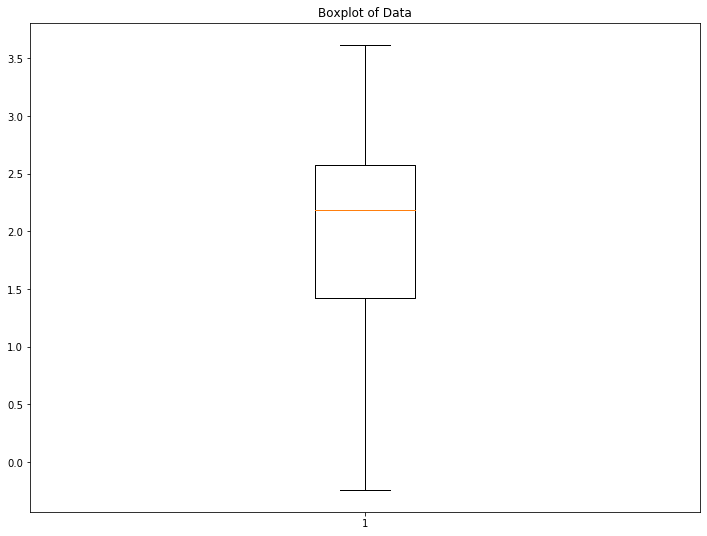

In [23]:
plt.boxplot(data)
plt.title('Boxplot of Data')

**Exercise:** Are these what you are expecting? What happened when you increase the sample size? What can these teach us about the dangerous of examining graphs? 

We can use the *mean* and *variance* functions from numpy to estimate the mean and variance from the data we generated. Since we know the true values, we can assess how good the estimates are. 

In [24]:
pop_mean = np.mean(data)
pop_variance = np.var(data, ddof=1)
print("The mean of the sample is {0:.4} and the variance is {1:.4}".format(pop_mean, pop_variance))

The mean of the sample is 1.979 and the variance is 0.9426


*Note that we use the string formatting notation 0:.4 and 1:.4 to control the number of decimal places shown in the answers.*

A quick t-test to examine the sample mean

$$ t = \sqrt{N}\frac{\hat{\mu}}{\hat{\sigma}}$$

In [34]:
(pop_mean-sm)/np.power(pop_variance/N, 0.5)

-0.1175753100349178

## Creating more samples
We can now create more samples by repeating the previous steps

In [27]:
B = 2500 #Set the number of samples 
sample = [sps.norm.rvs(size=N, loc=sm, scale=ss) for i in range(0,B)] 

The code above generated *B* samples, each with size *N* and stored them in the list called *sample*. It is possible to convert this into a $B\times N$ matrix. We shall leave them in a list for now. 

Let's say we would like to examine one of the samples. 

Text(0.5, 1.0, 'Sample Histogram')

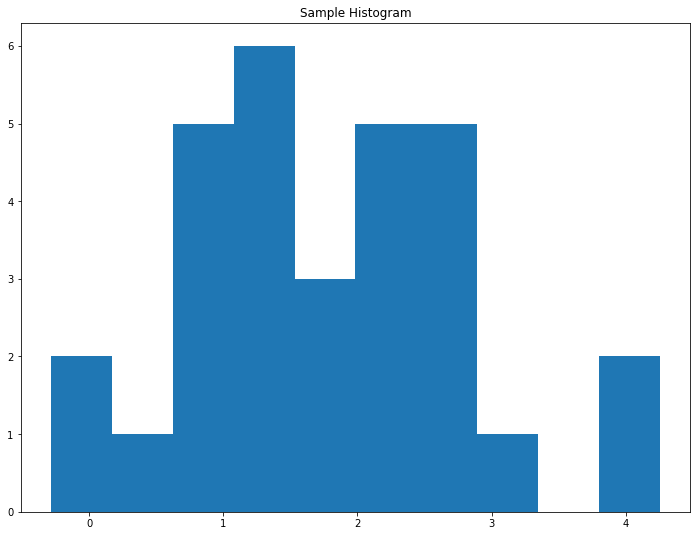

In [28]:
k = 10 #set the sample you want to examine. 
plt.hist(sample[k])
plt.title('Sample Histogram')

Text(0.5, 1.0, 'Sample Boxplot')

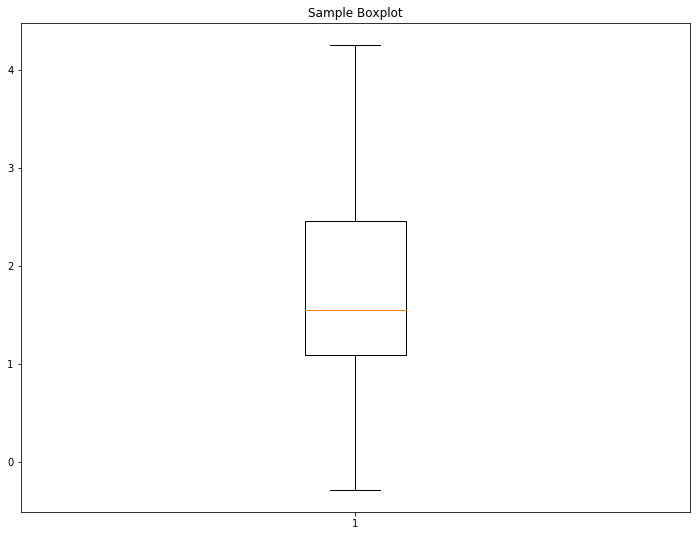

In [29]:
#Boxplot
plt.boxplot(sample[k])
plt.title('Sample Boxplot')

If we estimate estimate the population mean and variance from this sample, we get

In [30]:
sample_mean = np.mean(sample[k])
sample_variance = np.var(sample[k], ddof=1)
print('The estimated mean is {0:.4} and the estimated variance is {1:.4}'.format(sample_mean, sample_variance))

The estimated mean is 1.787 and the estimated variance is 1.134


By varying the value of *k* and re-run the code of the last two blocks, you can examine the mean and variance from the different samples. 

We can also calculate the means and variances of all samples with two lines of code.


In [37]:
sample_means = np.mean(sample,axis=1)
sample_variances = np.var(sample,axis=1)

Note that *sample_means* is a 1-D array containing all the means. This means we can examine the means from different samples using descriptive statistics. 

In [39]:
print('The average of all sample means is {0:.4}\n'.format(np.mean(sample_means)))
print('The variance of all the sample means is {0:.4}\n'.format(np.var(sample_means)))
print('The theoretical value of the sample mean variance is {0:4}\n'.format(ss/N))

The average of all sample means is 2.001

The variance of all the sample means is 0.03314

The theoretical value of the sample mean variance is 0.03333333333333333



Note that the variance of all the sample means matches up the theoretical value $Var(\hat{\mu})=\frac{\sigma^2}{N}$ which is $\frac{ss}{N}$ in this case. The estimate should be very close to the theoretical value.  

## An Alternative Method to Generate Samples
Instead of using list comprehension, it is also possible to generate the sample by using the random generator function. 
By specifying size=(B,n), the sps.norm.rvs function will generate a B X N matrix (a 2-D array with B rows and N columns). This gives an equivalent results as using list comprehension above. In general list comprehension and the use of **for** loop is more flexible, especially in the case when we want to generate non-iid random numbers. 

In [40]:
sample2 = sps.norm.rvs(size=(B,N),loc=sm,scale=ss)

We can now re-run the block code above to see similar results. 

In [41]:
sample2_means = np.mean(sample2,axis=1)
sample2_variances = np.var(sample,axis=1)

Text(0.5, 1.0, 'Sample Means')

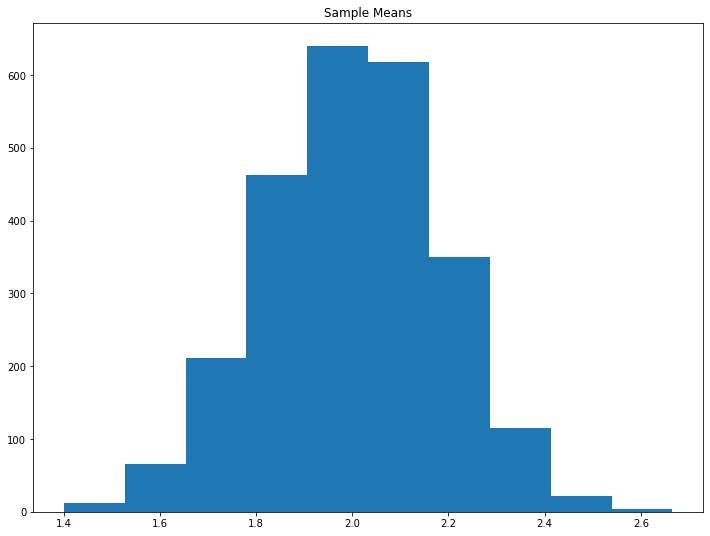

In [42]:
plt.hist(sample2_means)
plt.title('Sample Means')

Text(0.5, 1.0, 'Sample Variances')

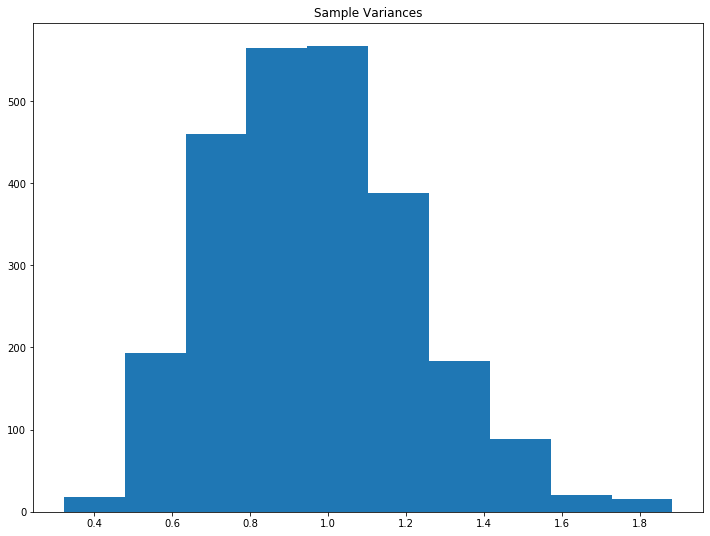

In [43]:
plt.hist(sample2_variances)
plt.title('Sample Variances')

## Exercise 

1. Repeat this exercise for other distributions, such as $\chi^2$ or $F$. 
2. How would this analysis be different between continuous and discrete random variables? 
3. Is it possible to generate a *population* in the case of a continuous random variable? 
